### Logistic Regression Classification - Visual QST & Responsiveness to Treatment Across 5 Chronic Pain Cohorts

In [1]:
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

## This sets the plot style
## to have a grid on a white background
sns.set_style("whitegrid")

In [3]:
## Load in data
data = pd.read_csv("/Users/noahwaller/Documents/3cohort-GIMME PAPER/csv_for-code/7cohort_visQST_allmetrics_outrem.csv", delimiter = ",")
data.head()

,subid,cohort,age,sex,vis01_unpl_avg,vis02_unpl_avg,vis03_unpl_avg,vis04_unpl_avg,vis05_unpl_avg,vis06_unpl_avg,...,pd02_bsl,wpi_bsl,sss_bsl,fm_score_bsl,pd02_6m,wpi_6m,sss_6m,fm_score_6m,responder_ratio,responder_bin
0,1,0,27,1,32.333333,36.333333,44.000000,57.000000,60.666667,61.666667,...,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0,30,1,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
2,3,0,61,1,27.333333,27.000000,39.000000,38.333333,43.000000,41.666667,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,0,45,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0,53,1,13.000000,8.666667,13.333333,10.000000,8.000000,7.666667,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
## Requires no missing values
data.dropna(subset=['responder_bin'], inplace=True)
data


,subid,cohort,age,sex,vis01_unpl_avg,vis02_unpl_avg,vis03_unpl_avg,vis04_unpl_avg,vis05_unpl_avg,vis06_unpl_avg,...,pd02_bsl,wpi_bsl,sss_bsl,fm_score_bsl,pd02_6m,wpi_6m,sss_6m,fm_score_6m,responder_ratio,responder_bin
34,1017,1,45,1,31.000000,37.666667,41.666667,56.666667,66.333333,71.666667,...,9.0,0.0,1.0,1.0,2.0,0.0,1.0,1.0,0.222222,1.0
35,1018,1,63,1,11.666667,23.333333,40.000000,53.333333,57.666667,67.000000,...,9.0,5.0,6.0,11.0,2.0,4.0,1.0,5.0,0.222222,1.0
36,1007,1,38,1,43.666667,48.666667,52.333333,69.333333,90.000000,93.666667,...,10.0,4.0,10.0,14.0,3.0,0.0,6.0,6.0,0.300000,1.0
37,1012,1,62,1,4.666667,2.000000,3.000000,3.333333,7.000000,11.000000,...,9.0,7.0,7.0,14.0,3.0,3.0,8.0,11.0,0.333333,1.0
38,1022,1,68,1,70.666667,59.000000,59.000000,61.666667,64.333333,65.666667,...,8.0,5.0,1.0,6.0,7.0,3.0,3.0,6.0,0.875000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,3096,6,40,1,78.333333,63.333333,45.000000,53.000000,44.333333,56.666667,...,10.0,0.0,3.0,3.0,8.0,7.0,6.0,13.0,0.800000,0.0
234,3172,6,46,1,75.333333,76.333333,73.333333,70.000000,71.666667,73.333333,...,9.0,8.0,12.0,20.0,8.0,3.0,8.0,11.0,0.888889,0.0
235,3286,6,28,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.0,15.0,2.0,17.0,8.0,5.0,3.0,8.0,0.800000,0.0
236,3007,6,54,1,23.000000,33.000000,49.666667,60.000000,70.000000,69.666667,...,9.0,12.0,9.0,21.0,9.0,0.0,9.0,9.0,1.000000,0.0


In [4]:
## Import
from sklearn.model_selection import train_test_split

In [19]:
#split dataset in features and target variable
feature_cols = ['vis01_unpl_avg', 'vis02_unpl_avg', 'vis03_unpl_avg', 'vis04_unpl_avg','vis05_unpl_avg','vis06_unpl_avg']
X = data[feature_cols] # Features
y = data.responder_bin # Target variable

In [20]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.2, random_state=11, stratify=y)

In [5]:
## import LogisticRegression
from sklearn.linear_model import LogisticRegression

In [24]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [27]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[2, 5],
       [2, 9]])

Text(0.5, 427.9555555555555, 'Predicted label')

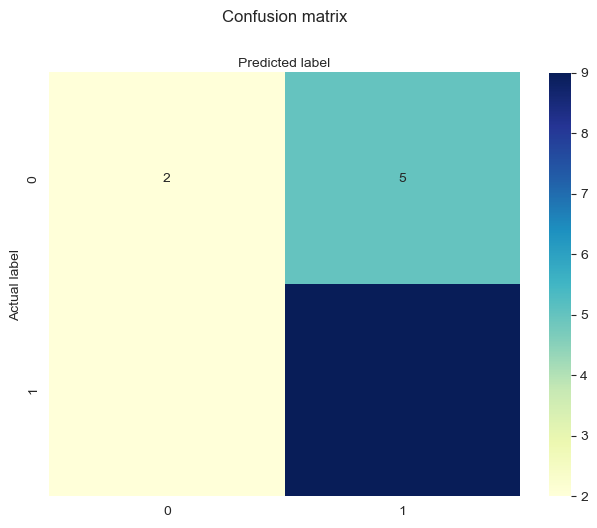

In [28]:
# visualize
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [26]:
# Plot figure 
plt.figure(figsize = (7,5))

# With classifications we have a new method
# predict_proba which returns the probability
# that an observation is a certain class.
plt.plot(np.linspace(0,1,1000),
            logreg.predict_proba(np.linspace(0,1,1000).reshape(-1,1))[:,1],
            'r--',linewidth=2.5,label = "Model Fit")
plt.scatter(X_train,y_train,label = 'Training Data',alpha=.7)
plt.legend(fontsize = 14,loc = 4)
plt.xlabel("Feature",fontsize = 12)
plt.ylabel("p(X)",fontsize=12) 

plt.show()

/Users/noahwaller/opt/anaconda3/envs/erdos_sp_2024/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


ValueError: X has 1 features, but LogisticRegression is expecting 6 features as input.

<Figure size 700x500 with 0 Axes>